### Pulsar detection using mean stacking of image pixels
One of the most widely used formats for astronomical images is the Flexible Image Transport System. In a FITS file, the image is stored in a numerical array, which we can load into a NumPy array. FITS files also have headers which store metadata about the image. We're going to use the [Astropy](https://docs.astropy.org/en/stable/io/fits/) module.

Quoting from [An Introduction to Pulsars](https://www.atnf.csiro.au/outreach/education/everyone/pulsars/index.html):

In 1934 Walter Baade and Fritz Zwicky predicted the existence of neutron stars: stars which have collapsed under their own gravity during a supernova explosion. Stars like our Sun will not form neutron stars. After exhausting all their fuel, such small stars become white dwarfs. Only very massive stars (at least a few times more massive than our Sun) will undergo a supernova explosion and become neutron stars. Even more massive stars will collapse to form black holes.

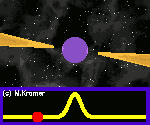

It was thought that neutron stars would never be detectable using telescopes on Earth. They were predicted to be very dense, to spin very fast, have a tiny radius of only about 10km and to possess large magnetic fields. However, we now know that charged particles moving along the magnetic field could cause beams of radiation to be emitted from the magnetic poles. Then, as the neutron star rotates, the beam would sweep across space. When this beam is in the direction of the Earth, a pulse may be detectable using a radio telescope (see the animation above).

In [1]:
# imports
from astropy.io import fits
import numpy as np

In [2]:
# function that calculates the mean stack
def mean_fits(files):
    n = len(files)
    hdul = fits.open(files[0])
    data = hdul[0].data
    for i in range(1,n):
        ldu = fits.open(files[i])
        data += hdul[0].data
    return data/n

Pixel value: 0.024676114320755005


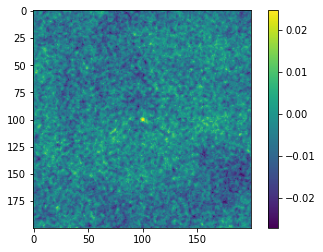

In [3]:
# call mean_fits
data  = mean_fits([
    'fits/image0.fits',
    'fits/image1.fits',
    'fits/image2.fits',
    'fits/image3.fits'
])
print('Pixel value:', data[100, 100])

# plot the result
import matplotlib.pyplot as plt
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()